In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import h5py
import json
import matplotlib 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import LinearLocator,FormatStrFormatter

import os
import sys  
import ast

from ast import literal_eval

from qutip import  *

sys.path.append('../../scripts') 

from qutip_tools import *


In [10]:
# define basic figure sizes
bwidth=7.5
bheight=5
base_font = 30

matplotlib.rcParams.update({'font.size': base_font,"legend.fontsize":base_font-5 ,"font.family": "serif", 
                            "font.serif": "CMU Serif, Times New Roman",
                           'text.usetex' : True })

sns.set_palette("colorblind")

fig_route = "../../plots/for_poster/"


# Misc.

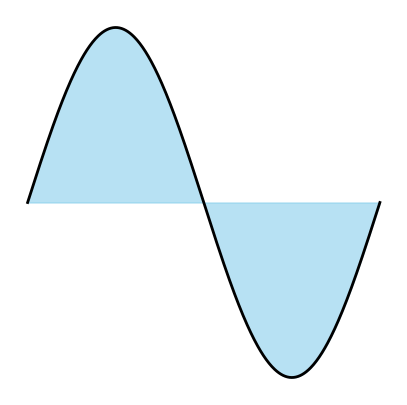

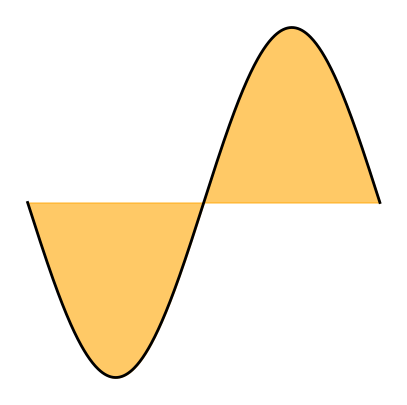

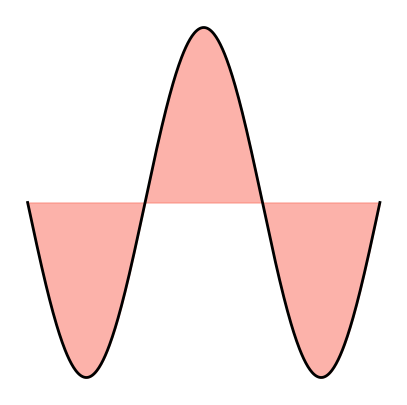

In [11]:
fig, ax = plt.subplots(1,1,figsize=(bheight,bheight))
# Create a sine wave
x = np.linspace(0, 2*np.pi, 500)
y = np.sin(x)

# Plot the line
plt.plot(x, y, color='black', linewidth=2)

# Fill the area under the curve
"skyblue"
"orange"
"salmon"
plt.fill_between(x, y, color='skyblue', alpha=0.6)

ax.set_xticks([])
ax.set_yticks([])

ax.spines[['right', 'top','bottom', 'left']].set_visible(False)
ax.set_ylabel("")

plt.savefig(fig_route+"sawblue.pdf", transparent=True)

fig, ax = plt.subplots(1,1,figsize=(bheight,bheight))

# Create a sine wave
x = np.linspace(np.pi, 3*np.pi, 500)
y = np.sin(x)

# Plot the line
plt.plot(x, y, color='black', linewidth=2)


plt.fill_between(x, y, color='orange', alpha=0.6)

ax.set_xticks([])
ax.set_yticks([])

ax.spines[['right', 'top','bottom', 'left']].set_visible(False)
ax.set_ylabel("")

plt.savefig(fig_route+"saworange.pdf", transparent=True)


fig, ax = plt.subplots(1,1,figsize=(bheight,bheight))

# Create a sine wave
x = np.linspace(-np.pi, 2*np.pi, 500)
y = np.sin(x)

# Plot the line
plt.plot(x, y, color='black', linewidth=2)

# Fill the area under the curve
"skyblue"
"orange"
"salmon"
plt.fill_between(x, y, color='salmon', alpha=0.6)

ax.set_xticks([])
ax.set_yticks([])

ax.spines[['right', 'top','bottom', 'left']].set_visible(False)
ax.set_ylabel("")

plt.savefig(fig_route+"sawsalmon.pdf", transparent=True)

# Exact Diag

In [30]:
J=1

data_df = pd.read_csv('../../data/exp_pro/exact_diag_L=100.csv')

data_df = data_df.drop(["Unnamed: 0"], axis=1).drop_duplicates()
data_df["times"] = data_df["times"].apply(lambda x: [float(i) for i in ast.literal_eval(x)])
data_df["entropy"] = data_df["entropy"].apply(lambda x: [float(i) for i in ast.literal_eval(x)])

print("Number of data points:", len(data_df))
print(data_df.columns)
# read as float
data_df.head()


Number of data points: 4048
Index(['L_qpc', 'Omega', 't', 'J', 'Jp', 'bond_index', 'K0', 'X0', 'Spread',
       'maxt_time', 'del_tau', 'qubit_init', 'Re_qubit_0', 'Im_qubit_0',
       'Re_qubit_1', 'Im_qubit_1', 'phi', 'alfabond', 'times', 'occupations',
       'd0_density', 'qubit_rho', 'entropy', 'time_at_bond', 'Max_entropy',
       'cos_theta', 'sin_phi'],
      dtype='object')


,L_qpc,Omega,t,J,Jp,bond_index,K0,X0,Spread,maxt_time,...,alfabond,times,occupations,d0_density,qubit_rho,entropy,time_at_bond,Max_entropy,cos_theta,sin_phi
0,100,0.3,0.0010,1.0,1.0,50,0.471239,30,7.0,90.0,...,0.000000,"[0.0, 0.18036072, 0.36072144, 0.54108214, 0.72...",[[8.50138349e-10 6.10116679e-10 4.08152706e-10...,[0.9995149 0.9995228 0.9995307 0.9995384 0...,[[[ 9.9951488e-01-1.5182491e-18j -3.9928066e-1...,"[3.0305274e-14, 1.7581003e-09, 6.884711e-09, 1...",16.304258,0.001273,"[(0.9990297889262199-3.0364981037886037e-18j),...",[(-0.9999999999783398+1.5641051977158236e-15j)...
1,100,0.6,0.0001,1.0,1.0,50,1.335177,30,7.0,90.0,...,0.785398,"[0.0, 0.18036072, 0.36072144, 0.54108214, 0.72...",[[8.5013835e-10 4.3120929e-10 1.9852993e-10 .....,[0.8542798 0.8542671 0.85425436 0.85424167 0...,[[[ 8.54279816e-01+6.1947737e-19j -4.13650975e...,"[5.957796e-15, 1.4174285e-06, 5.9591807e-06, 1...",6.123515,0.378318,"[(0.7085596831504888+1.2389547329576501e-18j),...","[(1.0000000000000022+1.7629991058577262e-18j),..."
2,100,1.0,5.0000,1.0,1.0,50,1.335177,30,7.0,90.0,...,0.000000,"[0.0, 0.18036072, 0.36072144, 0.54108214, 0.72...",[[8.5013835e-10 4.3120929e-10 1.9852993e-10 .....,[1.6294536e-01 9.3711525e-01 6.3535726e-01 4.2...,[[[ 1.62945360e-01-1.27528389e-18j 6.71293177...,"[3.486002e-14, 5.318428e-06, 2.0361124e-06, 4....",6.107399,0.012730,[(-0.6741092747142517-2.5505677821616677e-18j)...,"[(-0.9999999999999882-3.151456876125718e-18j),..."
3,100,0.3,2.0000,1.0,1.0,50,1.335177,30,7.0,90.0,...,1.570796,"[0.0, 0.18036072, 0.36072144, 0.54108214, 0.72...",[[8.5013835e-10 4.3120929e-10 1.9852993e-10 .....,[3.5419801e-01 7.0640618e-01 9.5576352e-01 9.7...,[[[ 3.54198009e-01-1.05042187e-18j -3.56707412...,"[-2.2437969e-14, 7.052946e-07, 2.1403334e-06, ...",6.097339,0.005146,"[(-0.2916039628831829-2.100843686497481e-18j),...","[(-1.0000000000000062-6.695479269988684e-19j),..."
4,100,0.1,0.5000,1.0,1.0,50,0.785398,30,7.0,90.0,...,0.785398,"[0.0, 0.18036072, 0.36072144, 0.54108214, 0.72...",[[8.5013835e-10 5.1519639e-10 2.8780883e-10 .....,[8.51792336e-01 9.09822226e-01 9.54556763e-01 ...,[[[8.5179234e-01-2.9826251e-19j 7.0065050e-17+...,"[1.3565272e-15, 3.7958728e-08, 1.2123684e-07, ...",9.271192,0.013401,"[(0.7035846780594077-5.96525016868039e-19j), (...","[(-0.9999999999999934+8.311523949855979e-19j),..."


In [31]:
Om_ = 0.3 
x0_ = 30
t_ = 0.1

af = data_df["alfabond"].sort_values().unique()[3]
print(data_df["alfabond"].sort_values().unique())
print(data_df["L_qpc"].unique())
LL = data_df["L_qpc"].unique()[0]
J = data_df["J"].unique()[0]

# For the vertical line cut
cond_ = (data_df["Omega"]==Om_) & (data_df["t"]==t_)  & (data_df["X0"]==x0_)  & (data_df["alfabond"]==af)
ver_df = data_df[cond_].sort_values(by="K0")
K0_unique = ver_df["K0"].unique()
colors = plt.cm.Blues(np.linspace(0.0,1.0,len(K0_unique)))

# For the horizontal line cut
k0_ = K0_unique[-2]
cond_ = (data_df["Omega"]==Om_) & (data_df["K0"]==k0_)  & (data_df["X0"]==x0_)  & (data_df["alfabond"]==af) 
hor_df = data_df[cond_].sort_values(by="t")
t_unique = hor_df["t"].unique()
colors_hor = plt.cm.Greens(np.linspace(0.0,0.9,len(t_unique)))
colors_hor = colors_hor[::-1]
t_unique

[0.         0.31415927 0.78539816 1.57079633]
[100]


array([1.e-04, 1.e-03, 1.e-02, 2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02,
       7.e-02, 8.e-02, 9.e-02, 1.e-01, 2.e-01, 3.e-01, 4.e-01, 5.e-01,
       7.e-01, 8.e-01, 9.e-01, 1.e+00, 2.e+00, 3.e+00, 5.e+00])

In [32]:
cond_ = (data_df["Omega"]==Om_) & (data_df["qubit_init"]=="fixed") & (data_df["X0"]==x0_) & (data_df["alfabond"]==af)
data_S = data_df[cond_].sort_values(by="K0")

S_df = data_S.pivot(index='K0', columns='t', values='Max_entropy')
S_df

t,0.0001,0.0010,0.0100,0.0200,0.0300,0.0400,0.0500,0.0600,0.0700,0.0800,...,0.3000,0.4000,0.5000,0.7000,0.8000,0.9000,1.0000,2.0000,3.0000,5.0000
K0,,,,,,,,,,,,,,,,,,,,,
0.471239,0.525690,0.525832,0.517018,0.493448,0.469222,0.449772,0.434349,0.422318,0.412004,0.401802,...,0.171680,0.158087,0.146885,0.124632,0.121675,0.110647,0.104570,0.006804,0.001864,0.000644
0.628319,0.401225,0.401309,0.398893,0.390236,0.377814,0.364303,0.351078,0.338773,0.329273,0.322329,...,0.153577,0.125856,0.115964,0.101202,0.095339,0.089758,0.084897,0.006283,0.001770,0.000634
0.785398,0.319818,0.319868,0.318953,0.315115,0.308812,0.300831,0.292051,0.283135,0.274479,0.266707,...,0.206602,0.128705,0.096343,0.084119,0.079780,0.075964,0.072590,0.005711,0.001925,0.000624
0.942478,0.267477,0.267512,0.267062,0.264923,0.261216,0.256196,0.250194,0.243591,0.236729,0.229877,...,0.216788,0.186234,0.117719,0.073191,0.070056,0.067749,0.065987,0.005522,0.002040,0.000726
1.099557,0.233946,0.233973,0.233707,0.232291,0.229765,0.226246,0.221887,0.216873,0.211404,0.205681,...,0.173182,0.185907,0.173929,0.080809,0.066512,0.064961,0.065175,0.005161,0.001903,0.000751
1.178097,0.222231,0.222255,0.222038,0.220823,0.218636,0.215563,0.211720,0.207246,0.202298,0.197040,...,0.156100,0.166830,0.175276,0.105117,0.074386,0.066093,0.067480,0.005281,0.001919,0.000753
1.256637,0.213193,0.213217,0.213033,0.211959,0.210009,0.207253,0.203783,0.199711,0.195165,0.190279,...,0.143294,0.150314,0.162428,0.133967,0.094484,0.074150,0.072444,0.004882,0.002008,0.000732
1.335177,0.206486,0.206508,0.206347,0.205368,0.203583,0.201047,0.197840,0.194057,0.189804,0.185200,...,0.134081,0.138561,0.147489,0.154783,0.122509,0.092840,0.081427,0.005146,0.001916,0.000770
1.413717,0.201858,0.201880,0.201734,0.200818,0.199139,0.196749,0.193716,0.190126,0.186073,0.181664,...,0.127876,0.130809,0.136999,0.159383,0.150000,0.120534,0.095971,0.004991,0.001861,0.000799


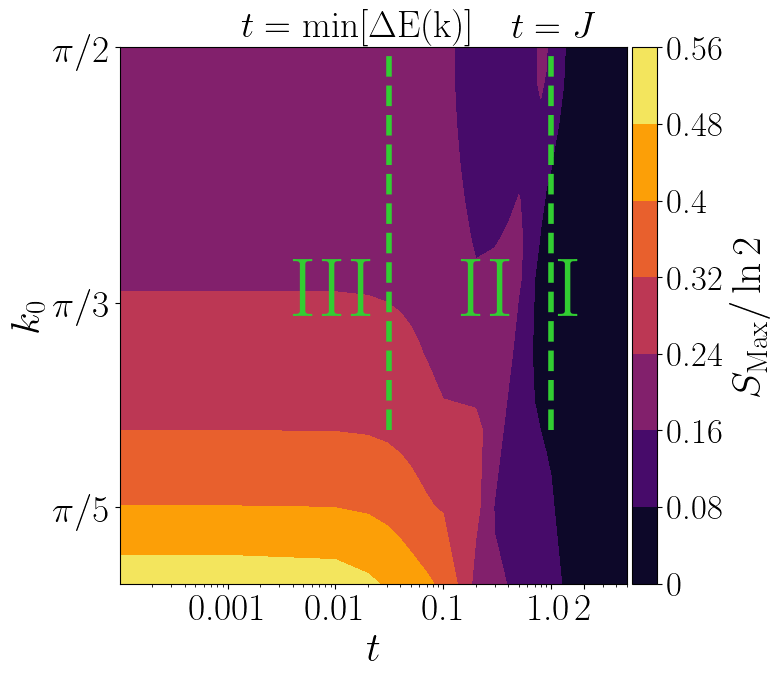

In [33]:
fig, ax = plt.subplots(1,1,figsize=(bwidth+1,bwidth))

vg_array = S_df.index
t_array = S_df.columns
im = ax.contourf(t_array, vg_array, S_df.values, cmap="inferno")
plt.xscale('log')

# Add anotate the regions
y_tick = np.pi/2 -0.04
ax.annotate(
    r'$t=\rm{min}[ \Delta E(k)]$', 
    xy=(np.pi/(LL+1), y_tick), 
    xytext=(np.pi/(LL+1) - 0.015, y_tick + 0.06), fontsize=27,ha='center')
ax.annotate(
    r'$t=J$', 
    xy=(J, y_tick), 
    xytext=(J, y_tick + 0.06), fontsize=27,ha='center')

# Add the labels for each region
ax.annotate('II', xy=(0.2+np.pi/50, 0.65*np.pi/2), 
            xytext=(0.2+np.pi/50, 0.65*np.pi/2),ha='center', c="limegreen", fontsize= 60,fontweight='bold')

ax.annotate('III', xy=(0.01, 0.65*np.pi/2), 
            xytext=(0.01, 0.65*np.pi/2),ha='center', c="limegreen", fontsize= 60,fontweight='bold')

ax.annotate('I', xy=(1.5, 0.65*np.pi/2), 
            xytext=(1.5, 0.65*np.pi/2),ha='center', c="limegreen", fontsize= 60,fontweight='bold')

ax.vlines([np.pi/(LL+1), J], ymin=0.5*np.pi/2, ymax=np.pi/2, color='limegreen', lw=4, linestyle="dashed", clip_on=False)  # tick-like line

ax.set_xticks( [0.001,0.01,0.1,1.0,2], [0.001, 0.01,0.1,1.0,2] ,fontsize=27)
ax.set_yticks( [np.pi/5,np.pi/3,np.pi/2], labels=[r"$\pi/5$",r"$\pi/3$",r"$\pi/2$"],fontsize=27 )

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

cbar = fig.colorbar(im, cax, shrink=0.9)   
cbar.ax.set_ylabel(r'$S_{\rm{Max}}/\ln{2}$', rotation=90, fontsize=30)
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2g'))
cbar.ax.tick_params(labelsize=25) 


ax.set_ylabel(r"$k_0$",fontweight='bold',fontsize=30)
ax.set_xlabel(r"$t$",fontweight='bold',fontsize=30)

plt.tight_layout()

#plt.savefig(fig_route+"entropy_phase_diagram_exact_L=60.pdf",transparent=True)

# MPS

In [34]:
# data_route = "../../data/MPS/L=100/"
J=1

In [20]:
data_df = pd.read_csv('../../data/exp_pro/TEBD_data_L=100.csv')
data_df = data_df.drop(["Unnamed: 0"], axis=1).drop_duplicates()
data_df["times"] = data_df["times"].apply(lambda x: [float(i) for i in ast.literal_eval(x)])
data_df["entropy"] = data_df["entropy"].apply(lambda x: [float(i) for i in ast.literal_eval(x)])

print("Number of data points:", len(data_df))
print(data_df.columns)
# read as float
data_df.head()


Number of data points: 89
Index(['Omega', 'X0', 'computation_time', 'L_qpc', 'cutoff', 't', 'bond_index',
       'max_time', 'K0', 'qubit_init', 'Spread', 'alfabond', 'J', 'evol_type',
       'del_tau', 'type', 'phi', 'times', 'occupations', 'd0_density',
       'qubit_rho', 'entropy', 'time_at_bond', 'Max_entropy', 'cos_theta',
       'sin_phi', 'bond_dimension'],
      dtype='object')


,Omega,X0,computation_time,L_qpc,cutoff,t,bond_index,max_time,K0,qubit_init,...,times,occupations,d0_density,qubit_rho,entropy,time_at_bond,Max_entropy,cos_theta,sin_phi,bond_dimension
0,0.3,25,1340.002090,100,1.000000e-18,0.800,50,70.710678,0.785398,fixed,...,"[0.0, 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49...",[[1.05818625e-08 8.69962147e-09 7.07433356e-09...,[[0.2021022 0.24885032 0.29874557 ... 0.87420...,[[[ 7.9789770e-01+2.7755576e-16j -2.0122792e-1...,"[1.9220558e-15, 1.03903275e-11, 4.584702e-11, ...",8.643728,0.080252,"[(0.5957954311730056+5.551115123125783e-16j), ...","[(0.9999997456356324+2.9968790373374003e-18j),...",[116. 3. 3. 3. 3. 3. 3. 3. 3. ...
1,0.3,25,937.310122,100,1.000000e-18,0.300,50,50.000000,1.570796,fixed,...,"[0.0, 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49...",[[1.05818625e-08 8.04748712e-09 6.04657568e-09...,[[0.9813025 0.9865655 0.99097025 ... 0.02105...,[[[ 1.8697474e-02+1.3986208e-17j -1.9428903e-1...,"[5.0922072e-14, 1.3304194e-12, 4.6329086e-12, ...",4.806571,0.127148,[(-0.9626050535259822+2.7972416050126014e-17j)...,"[(0.999999947612878-1.3177846465566946e-15j), ...",[115. 3. 3. 3. 3. 3. 3. 3. 3. ...
2,0.3,25,944.017709,100,1.000000e-18,0.001,50,50.000000,1.570796,fixed,...,"[0.0, 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49...",[[1.05818625e-08 8.04748712e-09 6.04657568e-09...,[[0.80391246 0.80385685 0.80380124 ... 0.77469...,[[[ 1.9608752e-01+1.1825427e-16j 1.4932174e-1...,"[2.2423986e-15, 1.00949015e-11, 4.28333e-11, 1...",5.113624,0.142005,[(-0.6078249373994418+2.3650853953234574e-16j)...,"[(-0.9999999360532182+2.875995621257259e-15j),...",[116. 3. 3. 3. 3. 3. 3. 3. 3. ...
3,0.3,25,2110.379669,100,1.000000e-18,2.000,50,110.134463,0.471239,fixed,...,"[0.0, 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49...",[[1.05818625e-08 9.31444610e-09 8.11903078e-09...,[[0.13887884 0.24851187 0.37773308 ... 0.94045...,[[[ 8.6112106e-01+1.3877788e-16j 9.0205621e-1...,"[4.715823e-14, 7.820974e-12, 3.9139723e-11, 1....",18.258161,0.006299,"[(0.7222421403254462+2.7755575615628914e-16j),...","[(0.9999996298385672+9.507797337726686e-16j), ...",[115. 3. 3. ... 3. 3. 3.]
4,0.3,25,1191.483507,100,1.000000e-18,0.070,50,85.065081,0.628319,fixed,...,"[0.0, 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49...",[[1.05818625e-08 8.98353480e-09 7.54790275e-09...,[[0.27623397 0.28062657 0.2850402 ... 0.85173...,[[[ 7.2376597e-01+2.77555756e-16j 2.2204460e-...,"[2.5627412e-15, 1.279339e-11, 5.1877735e-11, 1...",12.859252,0.322119,"[(0.4475319214713338+5.551115123125783e-16j), ...","[(0.99999981389832+6.210202175043916e-16j), (0...",[116. 3. 3. 3. 3. 3. 3. 3. 3. ...


## Phase Diagram

In [21]:
Om_ = 0.3 
x0_ = 25
t_ = 0.1

af = data_df["alfabond"].sort_values().unique()[0]
print(data_df["alfabond"].sort_values().unique())
print(data_df["L_qpc"].unique())
LL = data_df["L_qpc"].unique()[0]
J = data_df["J"].unique()[0]


[0.9424778]
[100]


In [22]:
print("Density at bond when hit")
print(np.cos(af/2)**2)
# filter out for the parameters we want 
cond_ = (data_df["evol_type"]=="TEBD2") & (data_df["Omega"]==Om_) & (data_df["t"]>0.0001) & (data_df["qubit_init"]=="fixed") & (data_df["X0"]==x0_) & (data_df["alfabond"]==af)

data_S = data_df[cond_].sort_values(by="K0")

S_df = data_S.pivot(index='K0', columns='t', values='Max_entropy')
S_df

Density at bond when hit
0.7938926261462367


t,0.001,0.010,0.030,0.050,0.070,0.100,0.300,0.500,0.800,1.000,2.000
K0,,,,,,,,,,,
0.471239,0.389329,0.433809,0.443956,0.430664,0.413170,0.380209,0.173941,0.143526,0.116709,0.105069,0.006299
0.628319,0.295227,0.314504,0.334742,0.330741,0.322119,0.316005,0.160063,0.116407,0.095755,0.085272,0.006143
0.785398,0.232954,0.241478,0.254900,0.258633,0.256102,0.250707,0.209629,0.098791,0.080252,0.073057,0.006120
0.942478,0.193427,0.197783,0.205507,0.209414,0.209626,0.206083,0.214769,0.124745,0.070523,0.066461,0.006058
1.099557,0.168394,0.170992,0.175716,0.178530,0.179277,0.177262,0.176368,0.168811,0.068155,0.065816,0.005967
1.256637,0.153018,0.154815,0.158059,0.160060,0.160711,0.159382,0.146726,0.162604,0.097294,0.073772,0.005931
1.413717,0.144659,0.146098,0.148660,0.150227,0.150734,0.149623,0.131637,0.139958,0.146888,0.098702,0.005896
1.570796,0.142005,0.143340,0.145704,0.147138,0.147590,0.146525,0.127148,0.132229,0.166586,0.117423,0.005887


In [23]:
# For the vertical line cuts
cond_ = (data_df["Omega"]==Om_) & (data_df["t"]==t_)  & (data_df["X0"]==x0_)  & (data_df["alfabond"]==af) & (data_df["evol_type"]=="TEBD2")
ver_df = data_df[cond_].sort_values(by="K0")
K0_unique = ver_df["K0"].unique()
colors = plt.cm.Blues(np.linspace(0.0,1.0,len(K0_unique)))

# For the horizontal line cuts
k0_ = K0_unique[-2]
cond_ = (data_df["Omega"]==Om_) & (data_df["K0"]==k0_)  & (data_df["X0"]==x0_)  & (data_df["alfabond"]==af) & (data_df["evol_type"]=="TEBD2")
hor_df = data_df[cond_].sort_values(by="t")
t_unique = hor_df["t"].unique()
colors_hor = plt.cm.Greens(np.linspace(0.0,0.9,len(t_unique)))
colors_hor = colors_hor[::-1]
t_unique

array([1.e-03, 1.e-02, 3.e-02, 5.e-02, 7.e-02, 1.e-01, 3.e-01, 5.e-01,
       8.e-01, 1.e+00, 2.e+00])

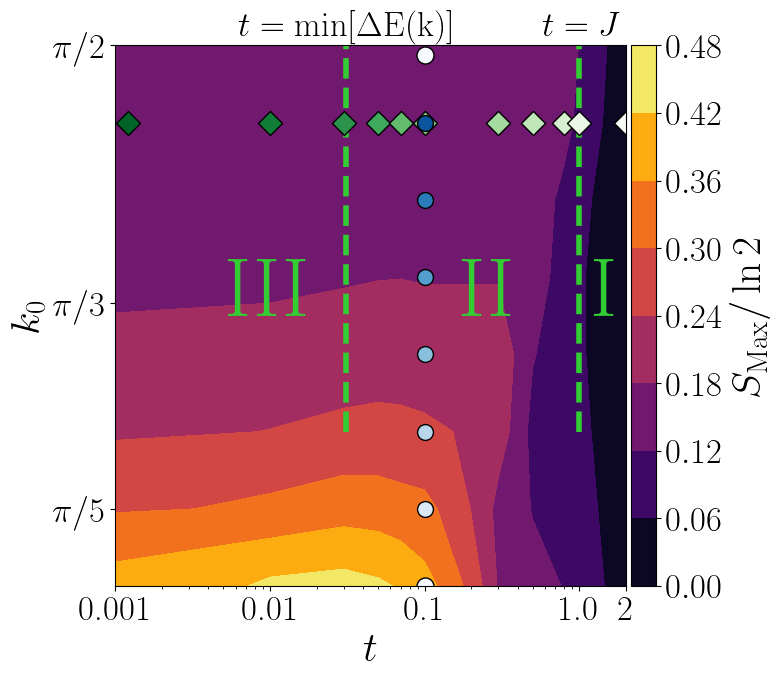

In [24]:
fig, ax = plt.subplots(1,1,figsize=(bwidth+1,bwidth))

# plot the heatmap
vg_array = S_df.index
t_array = S_df.columns
im = ax.contourf(t_array, vg_array, S_df.values, cmap="inferno")
plt.xscale('log')

# Add anotate the regions
y_tick = np.pi/2 -0.04
ax.annotate(
    r'$t=\rm{min}[ \Delta E(k)]$', 
    xy=(np.pi/(LL+1), y_tick), 
    xytext=(np.pi/(LL+1), y_tick + 0.06), fontsize=25,ha='center')
ax.annotate(
    r'$t=J$', 
    xy=(J, y_tick), 
    xytext=(J, y_tick + 0.06), fontsize=25,ha='center')

# Add the labels for each region
ax.annotate('II', xy=(0.2+np.pi/50, 0.65*np.pi/2), 
            xytext=(0.2+np.pi/50, 0.65*np.pi/2),ha='center', c="limegreen", fontsize= 60,fontweight='bold')

ax.annotate('III', xy=(0.01, 0.65*np.pi/2), 
            xytext=(0.01, 0.65*np.pi/2),ha='center', c="limegreen", fontsize= 60,fontweight='bold')

ax.annotate('I', xy=(1.5, 0.65*np.pi/2), 
            xytext=(1.5, 0.65*np.pi/2),ha='center', c="limegreen", fontsize= 60,fontweight='bold')

ax.vlines([np.pi/(LL+1), J], ymin=0.5*np.pi/2, ymax=np.pi/2, color='limegreen', lw=4, linestyle="dashed", clip_on=False)  # tick-like line

# add first scatterplot points by hand
    
ax.scatter(t_unique[0]+ 0.0002,k0_, marker="D" ,s=150, edgecolor="black",color=colors_hor[0]) 

for ti in range(1,len(t_unique)-1):  
    ax.scatter(t_unique[ti], k0_ , marker="D" ,s=150, edgecolor="black",color=colors_hor[ti],zorder=5)
    
ax.scatter(t_unique[-1] - 0.0002, k0_, marker="D" ,s=150, edgecolor="black",color=colors_hor[-1])

ax.scatter(t_ , K0_unique[0], s=150, edgecolor="black",color=colors[0])
for ki in range(1,len(K0_unique)-1):
    ax.scatter(t_, K0_unique[ki], s=130, edgecolor="black",color=colors[ki], zorder=7)
ax.scatter(t_, K0_unique[-1]-0.02, s=150, edgecolor="black",color=colors[0])


ax.set_xticks( [0.001,0.01,0.1,1.0,2], [0.001,0.01,0.1,1.0,2] ,fontsize=25)
ax.set_yticks( [np.pi/5,np.pi/3,np.pi/2], labels=[r"$\pi/5$",r"$\pi/3$",r"$\pi/2$"],fontsize=25 )

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im, cax, shrink=0.9)   
cbar.ax.set_ylabel(r'$S_{\rm{Max}}/\ln{2}$', rotation=90, fontsize=30)
cbar.ax.tick_params(labelsize=25) 


ax.set_ylabel(r"$k_0$",fontweight='bold',fontsize=30)
ax.set_xlabel(r"$t$",fontweight='bold',fontsize=30)

plt.tight_layout()

plt.savefig(fig_route+"entropy_phase_diagram_MPS_L=100.pdf",transparent=True)

## Entropy Production

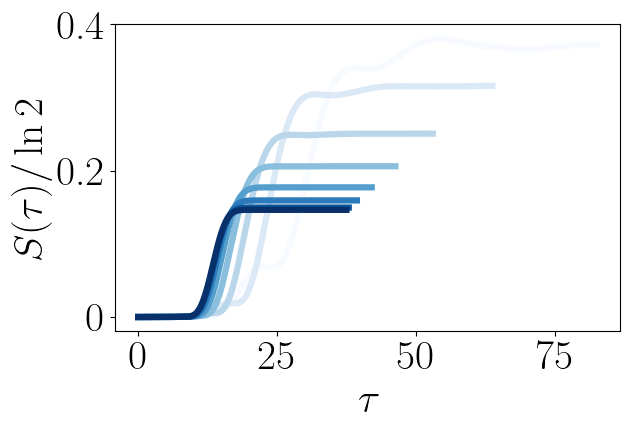

In [25]:
# Create 2x2 sub plots

fig, ax = plt.subplots(1,1, figsize=(bwidth-0.5,bheight))

for i in range(0,len(K0_unique)):
    # Entropy in time
    xvals = ver_df[ver_df["K0"]== K0_unique[i]]["times"].item()
    yvals = ver_df[ver_df["K0"]== K0_unique[i]]["entropy"].item()
    ax.plot(xvals,yvals, linewidth=4.5, color=colors[i])
    
ax.set_ylabel(r"$S(\tau)/\ln{2}$")
ax.set_xlabel(r"$\tau$")
ax.set_yticks([0,0.2, 0.4], [0,0.2, 0.4])
plt.tight_layout()
plt.savefig(fig_route+"entropy_tau_MPS_L=100.pdf",transparent=True)

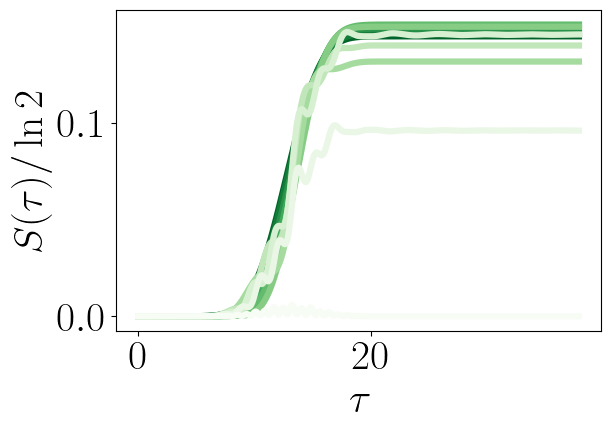

In [26]:
# Create 2x2 sub plots

fig, ax = plt.subplots(1,1, figsize=(bwidth-0.5,bheight))

for i in range(0,len(t_unique)):
    # Entropy in time
    xvals = hor_df[hor_df["t"]== t_unique[i]]["times"].item()
    yvals = hor_df[hor_df["t"]== t_unique[i]]["entropy"].item()
    ax.plot(xvals,yvals, linewidth=4.5, color=colors_hor[i])
    
ax.set_ylabel(r"$S(\tau)/\ln{2}$")
ax.set_xlabel(r"$\tau$")
#ax.set_yticks([0,0.2, 0.4], [0,0.2, 0.4])
plt.tight_layout()

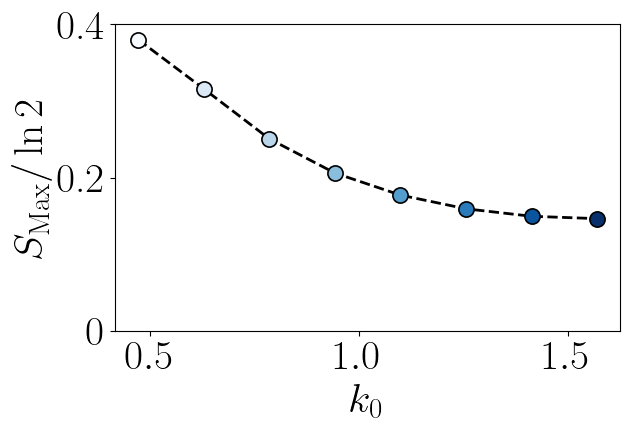

In [27]:
# Create 2x2 sub plots
fig, ax = plt.subplots(1,1, figsize=(bwidth-0.5,bheight))
line_x = []
line_y = []
for i in range(0,len(K0_unique)):
    # Entropy in time
    xvals = ver_df[ver_df["K0"]== K0_unique[i]]["K0"].item()
    yvals = ver_df[ver_df["K0"]== K0_unique[i]]["Max_entropy"].item()
    ax.scatter(xvals,yvals, linewidth=1.2, color=colors[i], s = 120, edgecolor="black")
    line_x.append(xvals)
    line_y.append(yvals)

plt.plot(line_x, line_y, linestyle= "dashed", linewidth=2,c="black", zorder=0)
    
ax.set_ylabel(r"$S_{\rm{Max}}/\ln{2}$")
ax.set_xlabel(r"$k_0$")
ax.set_yticks([0,0.2, 0.4], [0,0.2, 0.4])
plt.tight_layout()

plt.savefig(fig_route+"entropy_k0_MPS_L=100.pdf",transparent=True)

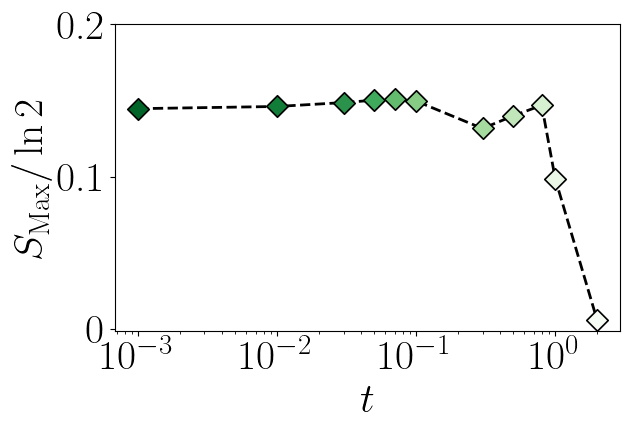

In [28]:
# Create 2x2 sub plots

fig, ax = plt.subplots(1,1, figsize=(bwidth-0.5,bheight))
line_x = []
line_y = []
for i in range(0,len(t_unique)):
    # Entropy in time
    xvals = hor_df[hor_df["t"]== t_unique[i]]["t"].item()
    yvals = hor_df[hor_df["t"]== t_unique[i]]["Max_entropy"].item()
    ax.scatter(xvals,yvals, linewidth=1.2, color=colors_hor[i], marker="D",s = 120, edgecolor="black")
    line_x.append(xvals)
    line_y.append(yvals)

plt.plot(line_x, line_y, linestyle= "dashed", linewidth=2,c="black", zorder=0)
    
ax.set_ylabel(r"$S_{\rm{Max}}/\ln{2}$")
ax.set_xlabel(r"$t$")
ax.set_xscale('log')

ax.set_yticks([0,0.1, 0.2], [0,0.1, 0.2])
plt.tight_layout()

plt.savefig(fig_route+"entropy_t_MPS_L=100.pdf",transparent=True)

Text(0.5, 0, '$t$')

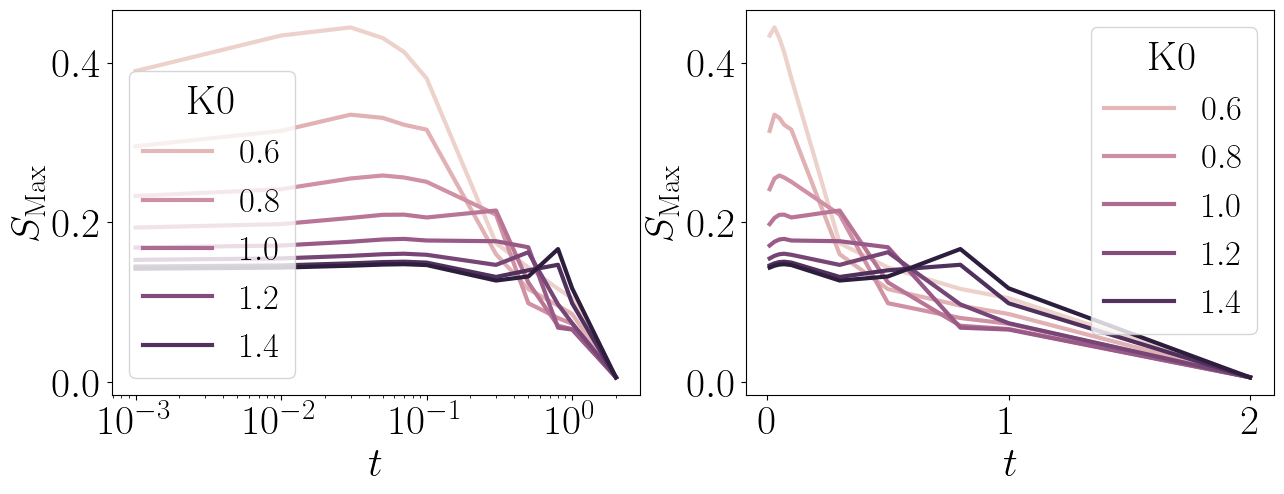

In [29]:
cond_ = (data_df["Omega"]==Om_)  & (data_df["X0"]==x0_) & (data_df["alfabond"]==af) & (data_df["t"]>0.0001)

fig, ax = plt.subplots(1,2, figsize=(2*bwidth, bheight))
sns.lineplot(data=data_df[cond_], x="t", y="Max_entropy", hue="K0", linewidth=3.0, ax = ax[0])
ax[0].set_xscale('log')
ax[0].set_ylabel(r"$S_{\rm{Max}}$")
ax[0].set_xlabel(r"$t$")

cond_ = (data_df["Omega"]==Om_)  & (data_df["X0"]==x0_) & (data_df["alfabond"]==af) & (data_df["t"]>=0.01)

sns.lineplot(data=data_df[cond_], x="t", y="Max_entropy", hue="K0", linewidth=3.0, ax = ax[1])
ax[1].set_ylabel(r"$S_{\rm{Max}}$")
ax[1].set_xlabel(r"$t$")